<a href="https://colab.research.google.com/github/nickstone1911/data-analysis-practice/blob/main/Support_Vector_Machines(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Business Analytics: Introduction to `Support Vector Machines (SVM)` in `scikit-learn`

In this code-along notebook, we will:

1. Introduce the basics of the `SVC` (Support Vector Classifier) classifier in `scikit-learn`, a popular machine learning classifier
2. Examine features and capabilities of `SVC`
3. Learn how to install and import the `SVC` classifier
4. Fit a SVC model to data
5. Visualize SVM boundries for 2D space
6. Explore SVC hyper parameters
---

## Resources
>- [SVM Intro Slides](https://docs.google.com/presentation/d/1Kt5oCx5aXmAclnykO8a9ch3IGXiZ44kyHmIlJh2hQpg/edit?usp=sharing)
>- [SVM: Maximum Margine Separator doc ](https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html)
>>- We will use this code from the `scikit-learn` documentation to plot the decision function and support vectors in 2D
>>>- [svm_margin_plot.py](https://drive.google.com/file/d/14wRATm6LnCRBn4OiQq555-1wN-sWS0t8/view?usp=sharing)
---
## Data File for Code-Along
>- Download/move the following file into your working directory
>- [mouse_viral_study.csv](https://drive.google.com/file/d/1k6msc2JndcTdsQCFhQ3bYRSwlbZ90mrc/view?usp=sharing)

---

# Importing Initial Libraries




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load the `mouse_viral_study.csv` Dataset
>- For this tutorial we will load the `mouse_viral_study.csv` dataset shared in this notebook

---
## Data Notes

The data in the `mouse_viral_study.csv` simulates a medical study in which mice infected with a virus were given various doses of two medicines and then checked 2 weeks later to see if they were still infected.

Given this data, our goal is to create a classification model then predict (given two dosage measurements) if they mouse will still be infected with the virus.

You will notice the groups are very separable, this is on purpose, to explore how the various parameters of an SVM model behave.

---

# Mount Drive and Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os

path = '/content/drive/MyDrive/BAIM4205'
os.chdir(path)
os.listdir()

['customer.csv',
 'winedata.csv',
 'W1D2 Agenda and Exercises - Student.ipynb',
 'W2D1 Lesson 24: Code-Along - Intro to Data Engineering with the BigQuery API.ipynb',
 'W1D1 - Working With Google Drive and the os Module_student.ipynb',
 'heart.csv',
 'mouse_viral_study.csv',
 'svm_margin_plot.py']

Load Data

In [ ]:
mdf = pd.read_csv('mouse_viral_study.csv')

In [ ]:
mdf.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


# Importing a Python Library from Drive

If you want to create your own functions or load other libraries in drive, this is the process:

1. Mount your Drive
2. Change the working directory to where you want to work (usually where you save your notebook(s))
3. Create, save, or move `.py` files to this working directory and import as usual
>- For this tutorial, download/move this `.py` file: [svm_margin_plot.py](https://drive.google.com/file/d/14wRATm6LnCRBn4OiQq555-1wN-sWS0t8/view?usp=sharing) and move it to your working directory

## Saving a Python Module in Colab
>- In this code-along notebook we are going to import a support vector machine plotting function so it might be helpful to get a quick review of how we save a python file to Drive and then import it to use in our project
>- After following steps 1-2 above, we can write a Python file by using the `%%writefile myfile.py` magics

In [ ]:
%%writefile mypythonfile.py

def my_function():
  print('Hello')

Writing mypythonfile.py


Now check your directory for your file and import it.

In [ ]:
os.listdir()

['customer.csv',
 'winedata.csv',
 'W1D2 Agenda and Exercises - Student.ipynb',
 'W2D1 Lesson 24: Code-Along - Intro to Data Engineering with the BigQuery API.ipynb',
 'W1D1 - Working With Google Drive and the os Module_student.ipynb',
 'heart.csv',
 'mouse_viral_study.csv',
 'svm_margin_plot.py',
 'mypythonfile.py']

In [ ]:
import mypythonfile as mpf

mpf.my_function()

Hello


Clean up and remove that tutorial file...

In [ ]:
os.remove(('mypythonfile.py'))

os.listdir()

['customer.csv',
 'winedata.csv',
 'W1D2 Agenda and Exercises - Student.ipynb',
 'W2D1 Lesson 24: Code-Along - Intro to Data Engineering with the BigQuery API.ipynb',
 'W1D1 - Working With Google Drive and the os Module_student.ipynb',
 'heart.csv',
 'mouse_viral_study.csv',
 'svm_margin_plot.py',
 '__pycache__']

## Now Let's Load the `svm_margin_plot` Library
>- This just contains one function from the `scikit-learn` documentation that makes it convenient to plot SVM charts
>- Make sure you downloaded/moved the `svm_margin_plot.py` file given at the beginning of the notebook and moved to your working directory

In [ ]:
from svm_margin_plot import plot_svm_boundary

---
# End of Video 1

---

# Data Exploration

>- Let's examine our dataset a bit before diving into how to use the `SVM` classifier

In [ ]:
mdf.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


In [ ]:
mdf['Virus Present'].value_counts()

0    200
1    200
Name: Virus Present, dtype: int64

In [ ]:
mdf.groupby('Virus Present').describe().transpose()

Virus Present            0           1
Med_1_mL count  200.000000  200.000000
         mean     7.584185    3.311782
         std      0.880815    0.913611
         min      5.270149    1.000000
         25%      6.898961    2.696821
         50%      7.634687    3.247405
         75%      8.181846    4.046966
         max     10.000000    5.689168
Med_2_mL count  200.000000  200.000000
         mean     7.725771    3.507730
         std      1.003774    0.999490
         min      5.194277    1.000000
         25%      6.999537    2.880567
         50%      7.785516    3.426269
         75%      8.439358    4.203161
         max     10.000000    6.526954

Let's look at a `pairplot`

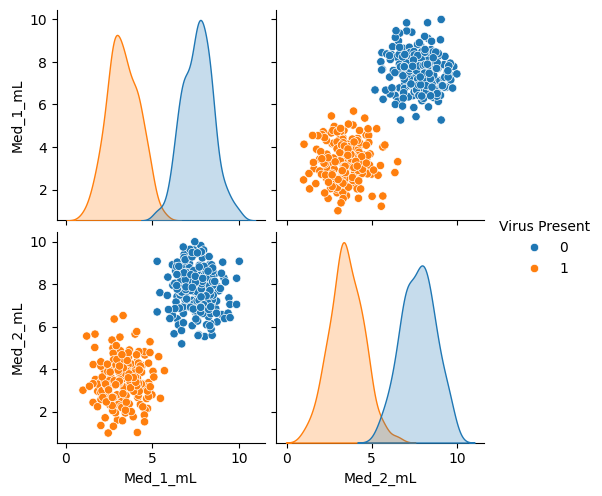

In [ ]:
sns.pairplot(data=mdf, hue = 'Virus Present')

Create a Scatter Plot and Estimate a Line to Separate the Classes

>- We made our data so that a line with a slope of -1 and a y-intercept of 11 will separate our classess pretty well. This won't be true in practice but will help illustrate how SVM work

In [ ]:
sns.scatterplot(x='Med_1_mL', y)

---
# End of Video 2

---

# Fitting a Support Vector Machine

>- In this lesson, we are going to fit a support vector classifier, explore model coefficients and support vectors, and explore SVC Hyper Parameters
>- We are intentionally leaving out important concepts such as scaling variables or doing cross validation because the focus is on learning about the modeling technique and it's parameters
>- Other lessons will cover scaling, data prep, cross validation, and more detail on hyper parameters

Resources
>- See [sklearn.svm.SVC doc](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Check help for a list of parameters. We will explore some of these later

Define Your Data

In [ ]:
y =mdf['Virus Present']
X =mdf.drop('Virus Present', axis=1)

Fit the Model

In [ ]:
svc_model = SVC(kernel='linear', C=1000)
svc_model.fit(X,y)

SVC(C=1000, kernel='linear')

Visualize the Support Vectors
>- Here we will use the function provided in the `scikit-learn` doc

In [ ]:
from svm_margin_plot import plot_svm_boundary

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


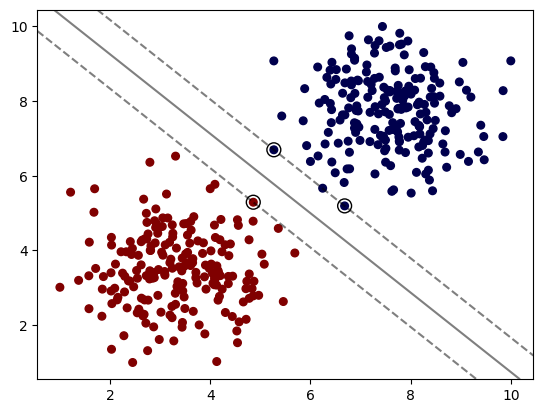

In [ ]:
plot_svm_boundary(svc_model, X,y)

---
# End of Video 3
---

# Interpreting Support Vectors and Model Coefficients

Support vectors and model coefficients work together to define the decision boundry in SVM. In this section we examine the support vectors and coefficients of our `svc_model`



---

## Support Vectors

>- Support vectors show us the data points that are closest to the decision boundry

>- Several attributes of the SVC model help us extract the support vectors
>>- `support_` shows us the index position of the support vecgtors
>>- `support_vectors_` shows us the values of the support vectors
>- We can combine these into a dataframe to easily see the support vectors and the value of the target class for each



In [ ]:
svc_model.support_

array([118, 145, 193], dtype=int32)

In [ ]:
y[svc_model.support_]

118    0
145    0
193    1
Name: Virus Present, dtype: int64

Now, let's create a dataframe of the support vectors and their their target values.

In [ ]:
support_vectors = svc_model.support_vectors_

svdf = pd.DataFrame(support_vectors, columns=X.columns)

sv_target_values = y[svc_model.support_]

svdf.index = sv_target_values

svdf

,Med_1_mL,Med_2_mL
Virus Present,,
0,6.683072,5.194277
0,5.270603,6.696839
1,4.859998,5.292483


## Model Coefficients

Support vectors and model coefficients work together to define the decision boundry in SVM. Since we used the `linear` kernel the coefficients can be interpreted with the following guidelines:
>- When using non-linear kernals the interpretation of coefficients becomes more complex and difficult

## Sign of Coefficients:

>- The sign of each coefficient (positive or negative) indicates the direction of the impact of the corresponding feature on the classification decision.
>- A positive coefficient for a feature means that an increase in the feature's value will contribute to the prediction of one class, while a negative coefficient implies that an increase in the feature's value will contribute to the prediction of the other class.
>- In general, the larger the absolute value of the coefficent, the more influential a feature is

## Magnitude of the Coefficients
>- The magnitude of the coefficients represents the strength of the influence of each feature on the decision boundary.
>- Larger magnitude coefficients suggest a more substantial impact on the classification decision.
>- Features with larger coefficients contribute more to the determination of the decision boundary.

## Importance of Features
>- Features with larger, non-zero coefficients are considered more important in the classification decision.
>- Features with coefficients close to zero have a minimal impact on the decision boundary and may be less relevant for the classification task.

## Interpretability

>- When coefficients are associated with specific features, it allows for interpretability. You can interpret the positive or negative contribution of each feature based on the sign of its coefficient.
>- For example, in a binary classification problem, if the coefficient for a feature is positive, an increase in that feature's value will likely move the prediction toward the positive class.

---

### Interpreting the Coefficients

>- Both features show a negative coefficient indicating that as dosages of both treatments go up, the mice classified as infected (the "1" class) go down
>- `Med_1_mL` has a slightly higher coefficient which would indicate it has a little bit more influence on predicting which mice will still be infected after treatment

---
# End of Video 4

---

# SVC Hyper Parameters

Hyper Parameters allow us to fine tune machine learning models. In this section we are going to explore some of the commonly adjusted hyper parmeters for SVC.

## C

The `C` parameter in the Support Vector Classifier is a regularization parameter that determines the strength of the regularization. It balances the desire to achieve a low training error (fit the training data well) against the goal of having a low testing error (generalize well to new, unseen data).

>- Basically what the means is for lower values of `C` we are allowing more cases to fall within the margin wider. If we increase `C` we are allowing less cases to fall within the margin




Now we will call `plot_svm_boundary()` with this new model to show the difference from our original model.

In [ ]:
model1 = SVC(kernel)

## Kernel

The kernel parameter specifies the type of kernel function to be used in the SVM model. The kernel function determines the shape of the decision boundary in the feature space.

SVMs work by finding a hyperplane in the feature space that separates the classes. Kernel functions allow the SVM to implicitly map the input data into a higher-dimensional space, making it possible to find non-linear decision boundaries.

The most common kernels for SVC are the `linear`, `rbf`, and polynomial kernels.

Let's look at some examples in the next few cells.

### `rbf` Kernel

### `polynomial` Kernels

One more, cubic polynomial...

## gamma

The gamma parameter is a regularization parameter that influences the shape of the decision boundary by controlling the width of the Gaussian (RBF) kernel. It determines the reach of individual data points, affecting the locality of the decision boundary.

>- A small gamma value results in a wider Gaussian kernel, leading to a smoother decision boundary that is influenced by a larger neighborhood of points
>- A large gamma value narrows the Gaussian kernel, making the decision boundary more influenced by a smaller, more localized set of points

## How to choose parameters?

It can be difficult to know what values to set for hyper parameters. Thankfully, `scikit-learn` provides the `GridSearchCV` library to find the "best" hyper parameters for us.

We will cover how to use `GridSearchCV` in another lesson so we could come back here after learning how to perform a grid search to test what the best parameters are for an SVC model.  

---
# End of Video 5 and Lesson Videos
---

# Not a Video Lecture...Using `GridSearchCV` to Find Optimal Hyper Parameters

>- Come back to this after the `GridSearchCV` Lesson

